# 2．記述統計の基本 ｜Pythonプログラミングを使った統計分析の基礎

### [Logics of Blue](https://logics-of-blue.com/) 馬場真哉：2019年3月1日

## 目的
- Pythonによる基本的な集計・図示の方法を学ぶ
    - データの集計
    - 様々なグラフを実際に描いてみる

 
## 目次
1. [数量データ×カテゴリデータの分析](#1．数量データ×カテゴリデータの分析)
2. [数量データ×数量データの分析](#2．数量データ×数量データの分析)
3. [もっと複雑なデータの集計](#3．もっと複雑なデータの集計)


In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 表示桁数の指定
%precision 3
# グラフをjupyter Notebook内に表示させるための指定
%matplotlib inline

# 不要なワーニングを出力させない
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1．数量データ×カテゴリデータの分析

In [2]:
# データの読み込み
fish_data = pd.read_csv("fish_length.csv")

# 先頭行を抽出
fish_data.head(n = 3)

,length,species
0,16.5,A
1,7.6,A
2,7.9,A


### 1．集計

<p>
    今回は、魚の種類別に体長データを集計することにします。<br>
    本来ならばデータの抽出～データの集計という手順を踏まなければなりません。<br>
    しかし、整然データを使うと、データの抽出を行うことなしで、あっという間に集計が終わります。
</p>

In [3]:
# 魚の種類別でグループを作る
group = fish_data.groupby("species")

In [4]:
# 平均値や標準偏差・四分位点などをまとめて出力
group.describe()

length                                                    
         count    mean       std  min     25%    50%     75%   max
species                                                           
A        100.0  10.240  3.555988  0.8   7.575  10.25  12.575  18.7
B        100.0  15.615  3.745067  5.3  13.800  15.95  18.000  25.1

In [5]:
# グループ別の平均値等、様々計算できる
group.mean()

,length
species,
A,10.240
B,15.615


In [6]:
# 平均・標準偏差・標準誤差をまとめて表示させる
group.agg([sp.mean, sp.std, stats.sem])

length                    
           mean       std       sem
species                            
A        10.240  3.555988  0.355599
B        15.615  3.745067  0.374507

### 2．図示

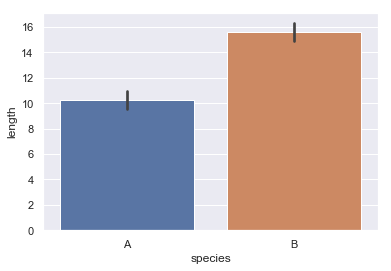

In [7]:
# 棒グラフ
# 平均値＋標準誤差の2つの情報を図示
sns.barplot(x = "species", y  = "length", data = fish_data)

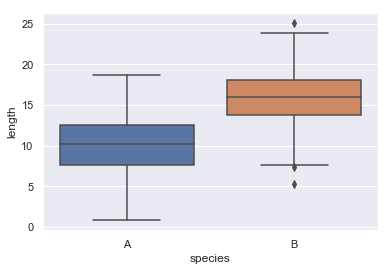

In [8]:
# 箱髭図
# 中央値＋四分位点
sns.boxplot(x = "species", y  = "length", data = fish_data)

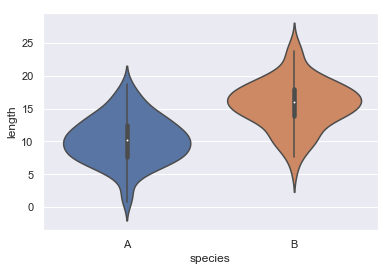

In [9]:
# バイオリンプロット（カーネル密度推定の結果を並べたもの）
# 分布の情報
sns.violinplot(x = "species", y  = "length", data = fish_data)

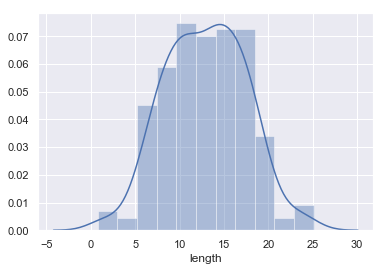

In [10]:
# 魚種をすべてまとめたヒストグラム
sns.distplot(fish_data.length)

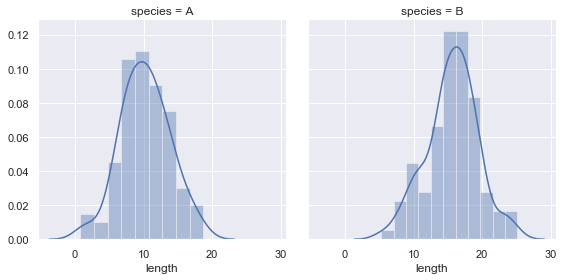

In [11]:
# 魚種別ヒストグラム
# speciesを対象に、グラフを2列に分ける。
g = sns.FacetGrid(fish_data,         # 対象データ
                  col = "species",   # speciesで列を分ける。rowなら行で分ける。
                  height = 4)        # グラフの大きさ

# lengthのヒストグラムを描く
g.map(sns.distplot, "length")

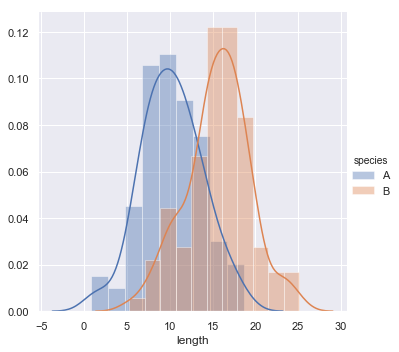

In [12]:
# 魚種別ヒストグラム
# speciesを対象に、グラフを色分けする
g = sns.FacetGrid(fish_data,         # 対象データ
                  hue = "species",   # speciesで色を分ける
                  height = 5)        # グラフの大きさ

# lengthのヒストグラムを描く
g.map(sns.distplot, "length")

# 凡例を追加
g.add_legend()

## 2．数量データ×数量データの分析

In [13]:
cov_data = pd.read_csv("covariate_data.csv")
cov_data

,temperature,sales
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


### 1．集計

In [14]:
# 統計量一覧
cov_data.describe()

,temperature,sales
count,10.000000,10.000000
mean,21.020000,42.700000
std,1.909508,5.292552
min,18.500000,34.000000
25%,19.250000,39.500000
50%,21.600000,42.500000
75%,21.950000,44.750000
max,23.800000,52.000000


### 2．図示

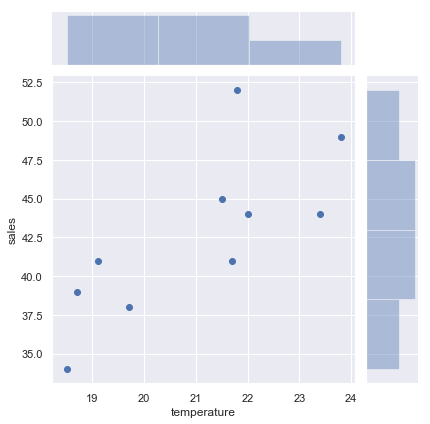

In [15]:
# 散布図を描くと、気温と売り上げの関係がよくわかる
sns.jointplot(x = "temperature", y = "sales", data = cov_data)

## 3．もっと複雑なデータの集計

In [16]:
# seaborn組み込みのアヤメのデータを取得
iris = sns.load_dataset("iris")
iris.head(n = 3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


### 1．集計

In [17]:
# 統計量一覧
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
# アヤメの種類別・特徴別の平均値
iris.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [19]:
# 平均値・標準偏差・標準誤差
iris.groupby("species").agg([sp.mean,sp.std,stats.sem])

sepal_length                     sepal_width                      \
                   mean       std       sem        mean       std       sem   
species                                                                       
setosa            5.006  0.352490  0.049850       3.428  0.379064  0.053608   
versicolor        5.936  0.516171  0.072998       2.770  0.313798  0.044378   
virginica         6.588  0.635880  0.089927       2.974  0.322497  0.045608   

           petal_length                     petal_width                      
                   mean       std       sem        mean       std       sem  
species                                                                      
setosa            1.462  0.173664  0.024560       0.246  0.105386  0.014904  
versicolor        4.260  0.469911  0.066455       1.326  0.197753  0.027966  
virginica         5.552  0.551895  0.078050       2.026  0.274650  0.038841

### 2．図示

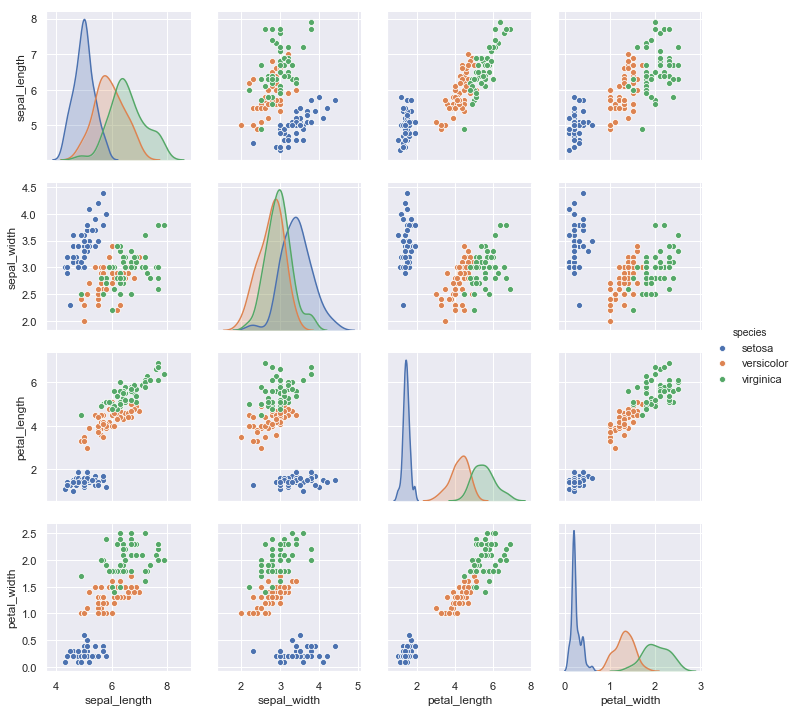

In [20]:
# ペアプロット(種類別に色分けされた散布図行列)
sns.pairplot(iris, hue="species")